# Conducción de calor No estacionaria.

**Objetivo.**

Resolver la ecuación de calor no estacionaria en 2D usando un método explícito.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/HeCompA/blob/main/01_Introduccion/02_cond_calor.ipynb">HeCompA - 02_cond_calor</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

 **Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

# Conducción de calor

**Jean-Baptiste Joseph Fourier**
fue un matemático y físico francés que ejerció una fuerte influencia en la ciencia a través de su trabajo *Théorie analytique de la chaleur*. En este trabajo mostró que es posible analizar la conducción de calor en cuerpos sólidos en términos de series matemáticas infinitas, las cuales ahora llevan su nombre: *Series de Fourier*. Fourier comenzó su trabajo en 1807, en Grenoble, y lo completó en París en 1822. Su trabajo le permitió expresar la conducción de calor en objetos bidimensionales (hojas muy delgadas de algún material) en términos de una ecuación diferencial:


$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$

donde $u$ representa la temperatura en un instante de tiempo $t$ y en un punto $(x,y)$ del plano Cartesiano y $\kappa$ es la conductividad del material.

La solución a la ecuación anterior se puede aproximar usando el método de diferencias y una fórmula explícita de dicha solución es la siguiente:

$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{h_t\kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$

donde:
- $u_{i,j} = u(x_i, y_j), u_{i+1,j} = u(x_{i+1}, y_j), u_{i-1,j} = u(x_{i-1}, y_j), u_{i,j+1} = u(x_i, y_{j+1}), u_{i,j-1} = u(x_i, y_{j-1})$. 
- El superíndice indica el instante de tiempo, entonces el instante actual es $n = t$ y el instante siguiente es $n+1 = t + h_t$, con $h_t$ el paso de tiempo.
- En este ejemplo $h_x = h_y$.

Usando esta aproximación, vamos a realizar una ejemplo de conducción de calor, pero para ello necesitamos conocer las herramientas de <a href="./T14_Numpy.ipynb">numpy</a> y de <a href="./T15_Matplotlib.ipynb">matplotlib</a>.

<div class="alert alert-success">

## Ejercicio 1.

 <img src="./malla2D_DF.png"  hspace="5" vspace="5" style="float: right;" width="250x"/>
Calculemos la transferencia de calor por conducción en una placa cuadrada unitaria usando el método de diferencias finitas. El problema se describe de la siguiente manera:
$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$ 

 </div>

**1. Definir los parámetros físicos y numéricos del problema:**

In [1]:
import numpy as np

In [2]:
# Parámetros físicos
k = 1.0  # Conductividad
Lx = 1.0  # Longitud del dominio en dirección x
Ly = 1.0  # Longitud del dominio en dirección y

# Parámetros numéricos
Nx = 9 # Número de incógnitas en dirección x
Ny = 9 # Número de incógnitas en dirección y
h = Lx / (Nx+1) # Espaciamiento entre los puntos de la rejilla
ht = 0.0001     # Paso de tiempo
N = (Nx + 2)* (Ny + 2) # Número total de puntos en la rejilla

**2. Definir la rejilla donde se hará el cálculo (malla):**

In [3]:
x = np.linspace(0,Lx,Nx+2) # Arreglo con las coordenadas en x
y = np.linspace(0,Ly,Ny+2) # Arreglo con las coordenadas en y
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
xg, yg = np.meshgrid(x,y) # Creamos la rejilla para usarla en Matplotlib
print(xg)
print(yg)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.

In [5]:
import matplotlib.pyplot as plt

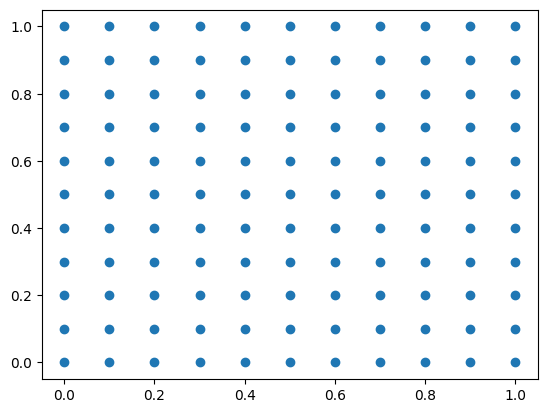

In [6]:
plt.scatter(xg, yg) # Graficamos la rejilla

**3. Definir las condiciones iniciales y de frontera:**
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$

In [7]:
u = np.zeros((Nx+2, Ny+2))
#u = np.zeros(N).reshape(Nx+2, Ny+2) # Arreglo para almacenar la aproximación
print(u)
u[0,:]    = 20  # Pared izquierda    
u[Nx+1,:] = 5   # Pared derecha
u[:,0]    = 50  # Pared inferior
u[:,Ny+1] = 8   # Pared superior  
print(u) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[50. 20. 20. 20. 20. 20. 20. 20. 20. 20.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  5.  5.  5.  5.  5.  5.  5.  5.  5.  8.]]


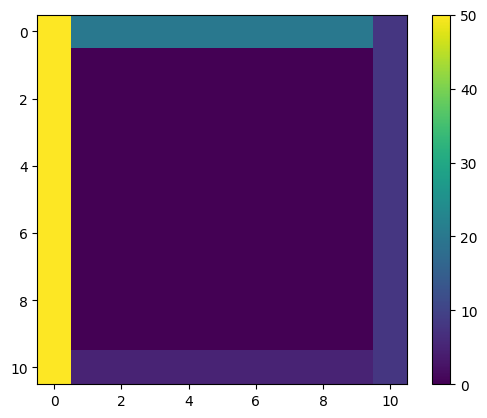

In [8]:
f = plt.imshow(u)
plt.colorbar(f)

**4. Implementar el algoritmo de solución:**
$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{h_t \kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$


[17.2629661414254, 13.602554907075358, 11.121464292079526, 9.370340343338656, 8.089431314598079, 7.121431307338295, 6.368158288285477, 5.766710029025608, 5.275727580531657, 4.867291496014421, 4.522054027452314, 4.226261372943586, 3.9698959855402296, 3.745493517737013, 3.547373613271126, 3.3711295389631717, 3.21328287724892, 3.0710454523767496, 2.9421521475712167, 2.824741357872151, 2.7172679513259683, 2.6184387521297463, 2.5271638648303663, 2.4425193146763595, 2.363717902820954, 2.290086125094306, 2.2210456430727876, 2.1560982312045556, 2.094813422134956, 2.0368182790286324, 1.9817888683696612, 1.9294431092766995, 1.8795347490871392, 1.8318482687809046, 1.7861945617665091, 1.7424072597326865, 1.7003396024699928, 1.6598617667041742, 1.620858583384764, 1.5832275844672883, 1.5468773296753073, 1.5117259715044917, 1.4777000231834065, 1.4447332996949114, 1.4127660064863383, 1.3817439543093082, 1.3516178818527333, 1.322342870562428, 1.293877838356635, 1.2661851009139355, 1.239229990882043, 1.

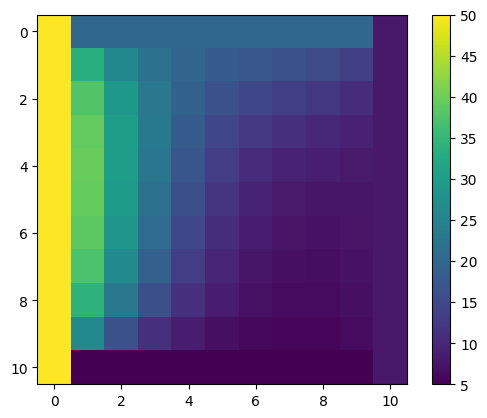

In [9]:
ht = 0.001
r = k * ht / h**2
u_new = u.copy()
tolerancia = 9.0e-1 #1.0e-3
error = 1.0
error_lista = []
while(error > tolerancia):
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            u_new[i,j] = u[i,j] + r * (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j])
    error = np.linalg.norm(u_new - u)
    error_lista.append(error)
#    print(error)
    u[:] = u_new[:]

print(error_lista)

f = plt.imshow(u)
plt.colorbar(f)

<div class="alert alert-success">

## Ejercicio 2.

Realiza los siguiente gráficos de la solución anterior:
1. Contornos llenos (`contourf`) y líneas de contorno negras sobrepuestas (`contour`).
2. Almacena el error en cada iteración y grafícalo en semi-log.
3. Realiza las dos gráficas anteriores en un solo renglón.

</div>

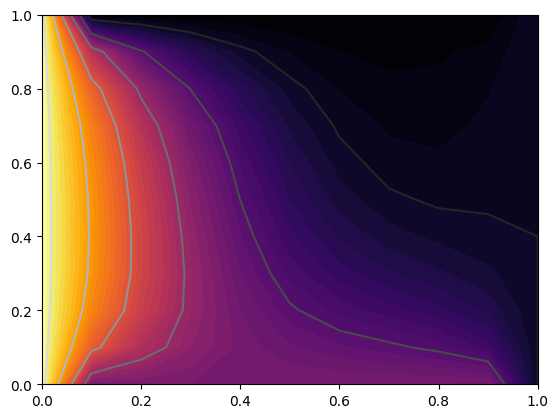

In [10]:
plt.contour(xg, yg, u, cmap='gray', levels=5)
plt.contourf(xg, yg, u, levels=50, cmap='inferno')

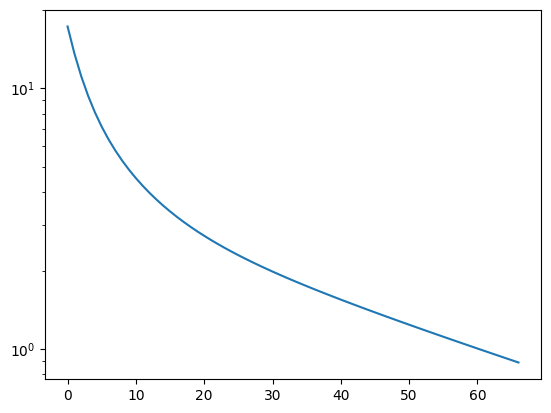

In [11]:
plt.plot(error_lista)
plt.yscale('log')

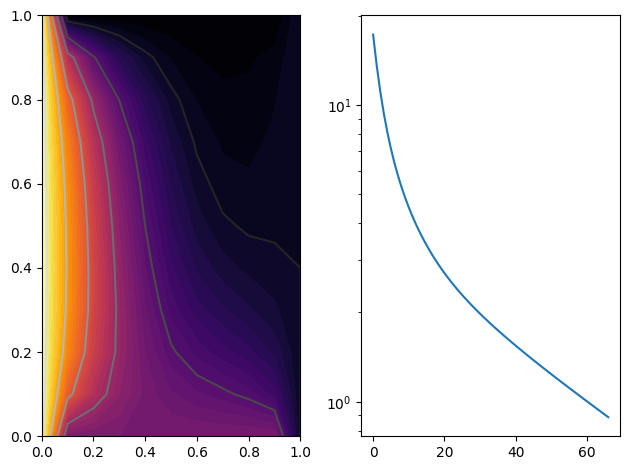

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.contour(xg, yg, u, cmap='gray', levels=5)
ax1.contourf(xg, yg, u, levels=50, cmap='inferno')

ax2.plot(error_lista)
ax2.set_yscale('log')

plt.tight_layout()

## Flujo de calor

Fourier también estableció una ley para el flujo de calor que se escribe como:

$$
\vec{q} = -\kappa \nabla u = -\kappa \left(\dfrac{\partial u}{\partial x}, \dfrac{\partial u}{\partial y}\right)
$$

<div class="alert alert-success">

## Ejercicio 3.
Usando la información calculada de la temperatura (almacenada en el arreglo `u`), vamos a calcular el flujo de calor usando la siguiente fórmula en diferencias:

$$
\vec{q}_{i,j} = (qx_{i,j}, qy_{i,j}) = -\dfrac{\kappa}{2h} (u_{i+1,j}-u_{i-1,j}, u_{i,j+1}-u_{i,j-1} )
$$

</div>

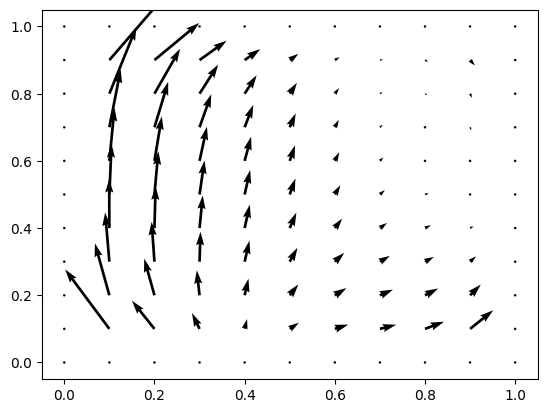

In [15]:
qx = np.zeros((Nx+2, Ny+2))
qy = qx.copy()

s = k / 2*h
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        qx[i,j] = -s * (u[i+1,j] - u[i-1,j])
        qy[i,j] = -s * (u[i,j+1] - u[i,j-1])

plt.quiver(xg, yg, qx, qy, scale=10, zorder=10)

<div class="alert alert-success">

## Ejercicio 4.
Grafica el campo vectorial del flujo de calor, junto con los contornos de la temperatura (`contourf` y `contour`). Haz que tu gráfica se vea con razón de aspecto correcta de 1 por 1.

</div>

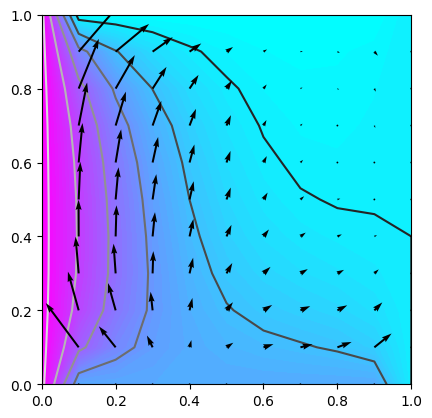

In [16]:
plt.contour(xg, yg, u, cmap='gray', levels=5)
plt.contourf(xg, yg, u, levels=50, cmap='cool', zorder=1)
plt.quiver(xg, yg, qx, qy, scale=10, zorder=10)
ax = plt.gca()
ax.set_aspect('equal')

# Seguimiento de partículas

<div>
 <img src="./Figuras/Vectorial.png"  hspace="5" vspace="5" style="float: right;"/>
Si soltamos una partícula en un flujo, dicha partícula seguirá la dirección del flujo y delineará  una trayectoria como se muestra en la siguiente figura. Para calcular los puntos de la trayectoria debemos resolver una ecuación como la siguiente:
    
$$
\dfrac{\partial \vec{x}}{ \partial t} = \vec{v} \qquad \text{con} \qquad \vec{x}(t=0) = \vec{x}_o 
$$
    
donde $\vec{x} = (x,y) $ representa la posición de la partícula y $\vec{v} = (vx, vy)$ su velocidad.
El método más sencillo para encontrar las posiciones de la partícula es conocido como de *Euler hacia adelante* y se escribe como:
    
$$
\vec{x}_i^{n+1} = \vec{x}_i^{n} + h_t * \vec{v}_{i}^n
$$
    
donde $\vec{x}_i^{n}$ representa la posición de la partícula $i$ en el instante $n$, $h_t$ es el paso de tiempo y $\vec{v}_i$ es la velocidad en la partícula $i$ en el instante $n$.
 </div>


<div class="alert alert-success">

## Ejercicio 5.
Calcular y graficar las trayectorias de varias partículas usando el campo vectorial generado por el flujo de calor del ejemplo 2.

</div>

Escribimos la fórmula de *Euler hacia adelante* en componentes como sigue:

$$
\begin{eqnarray}
x_i^{n+1} & = & x_i^{n} + h_t * vx_{i}^n \\
y_i^{n+1} & = & y_i^{n} + h_t * vy_{i}^n 
\end{eqnarray}
$$

**1. Definimos un punto inicial de forma aleatoria en el cuadrado unitario:**

In [17]:
xo = 0.2 #np.random.rand(1)
yo = 0.5 #np.random.rand(1)
print(xo)
print(yo)

0.2
0.5


**2. Definimos arreglos para almacenar las coordenadas de la trayectoria:**

In [18]:
Pasos = 10
xp = np.zeros(Pasos)
yp = np.zeros(Pasos)
xp[0] = xo
yp[0] = yo
print(xp)
print(yp)

[0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


(0.0, 1.0)

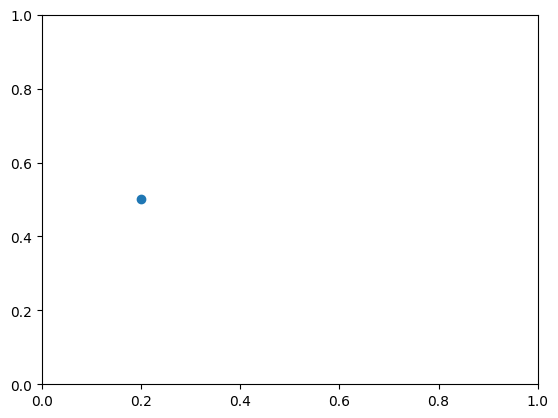

In [19]:
plt.plot(xp[0], yp[0], 'o-')
plt.xlim(0,1)
plt.ylim(0,1)

**3. Implementamos el método de Euler hacia adelante**:

In [20]:
# Interpolación de la velocidad
def interpolaVel(qx, qy, xpi, ypi, h):
    # localizamos la partícula dentro de la rejilla:
    li = int(xpi/h)
    lj = int(ypi/h)
    return (qx[li,lj], qy[li,lj])

In [21]:
ht = 0.1
for n in range(1,Pasos):
    vx, vy = interpolaVel(qx, qy, xp[n-1], yp[n-1], h)
    xp[n] = xp[n-1] + ht * vx
    yp[n] = yp[n-1] + ht * vy

In [22]:
print(xp)
print(yp)

[0.2        0.21738397 0.23476794 0.25215191 0.26953588 0.28691984
 0.31035226 0.32940321 0.34845415 0.36750509]
[0.5        0.52197449 0.54394898 0.56592346 0.58789795 0.60987244
 0.62441928 0.64213907 0.65985885 0.67757864]


(0.0, 1.0)

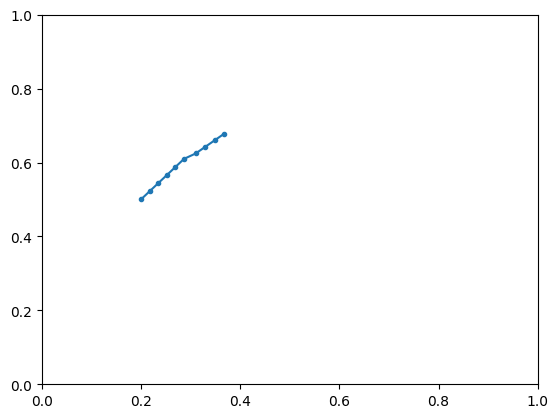

In [23]:
plt.plot(xp, yp, '.-')
plt.xlim(0,1)
plt.ylim(0,1)

<div class="alert alert-success">

## Ejercicio 6.
Dibuja la trayectoria de la siguiente manera.
- El primer punto color naranja transparente y contorno negro. 
- Las posiciones siguientes de color negro sobre puestas sobre la trayectoria.
- La trayectoria de color gris.
- Verifica que la trayectoria no se salga del cuadrado unitario.

</div>

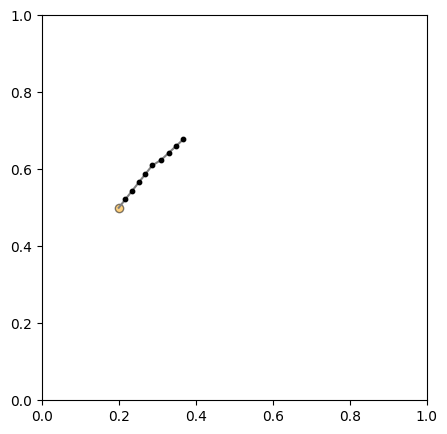

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(xp[0], yp[0], c='orange', edgecolor='k', alpha=0.5)
plt.plot(xp, yp, c='gray')
plt.scatter(xp[1:], yp[1:], c='k', s=10, zorder=5)
plt.xlim(0,1)
plt.ylim(0,1)
ax = plt.gca()
ax.set_aspect('equal')
plt.savefig('trayectoria1.pdf')

<div class="alert alert-success">

## Ejercicio 7.
Dibuja varias trayectorias que inicien en sitios diferentes.

</div>

<div class="alert alert-success">

## Ejercicio 8.
Implementa una interpolación bilineal para calcular la velocidad.

</div>